In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# import importance method
from sklearn.inspection import permutation_importance

# import model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, f1_score, accuracy_score
from sklearn.svm import SVC
from sklearn import svm

# import evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# Load dataset

In [ ]:
df_moca = pd.read_csv('/content/drive/MyDrive/dementia project/dataset/moca.csv')
df_moca.describe()

In [107]:
df_drawing = pd.read_csv('/content/drive/MyDrive/dementia project/dataset/drawing.csv')
df_drawing.describe()

,stfp,stsp,itfp,itsp,itp-avg,itp-max,itp-med,itp-std,its-avg,its-max,...,ids-std,dsp-avg,dsp-med,dsp-max,dsp-std,dss-avg,dss-min,dss-max,dss-std,Disease State
count,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,...,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000
mean,1.905074,0.813037,2.403695,1.310624,0.019727,0.323552,0.017783,0.017187,1.147739,1.735854,...,0.317450,2.185050,1.152871,66.058236,4.840612,3.631204,1.135500,15.811183,4.201986,0.263027
std,0.806071,0.985888,0.687542,1.010638,0.003673,0.579095,0.002289,0.026556,0.529474,0.627210,...,0.255430,27.853490,14.358145,1750.621401,107.986825,80.207324,14.378503,525.357829,146.109939,0.440414
min,0.000000,0.000000,0.000100,0.000000,0.000017,0.000050,0.000017,0.000004,0.000963,0.001868,...,0.000000,0.057582,0.000000,0.622576,0.075326,0.048369,0.001885,0.066966,0.000000,0.000000
25%,1.384104,0.000000,2.036273,0.015758,0.017249,0.063913,0.016857,0.005287,0.768577,1.294933,...,0.131265,0.253688,0.138709,2.261405,0.296091,0.241820,0.113012,0.377145,0.062876,0.000000
50%,1.941757,0.478403,2.441085,1.448565,0.018689,0.113774,0.016857,0.008515,1.030224,1.719099,...,0.245941,0.355168,0.202433,3.376686,0.430078,0.348120,0.183382,0.556488,0.112435,0.000000
75%,2.411529,1.430192,2.847145,1.971229,0.021580,0.249201,0.017840,0.015297,1.438152,2.164326,...,0.428448,0.500424,0.309575,5.473162,0.653677,0.506256,0.301385,0.842289,0.186101,1.000000
max,7.671247,8.481566,7.670684,8.483162,0.052839,3.794612,0.024693,0.218451,3.027309,4.196540,...,1.399184,681.297853,288.589350,69653.165920,4208.143953,3097.545809,351.830262,21049.918560,5859.114821,1.000000


In [ ]:
df_comb = pd.read_csv('/content/drive/MyDrive/dementia project/dataset/combine.csv')
df_comb.describe()

In [2]:
df_drawing_new = pd.read_csv('/content/drive/MyDrive/dementia project/dataset/drawing_features.csv')
df_drawing_new.describe()

,stfp,stsp,itfp,itsp,itp-avg,itp-max,itp-med,itp-std,its-avg,its-max,...,ids-std,dsp-avg,dsp-med,dsp-max,dsp-std,dss-avg,dss-min,dss-max,dss-std,Disease State
count,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,...,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000
mean,1.887448,0.796239,2.386884,1.306860,0.019722,0.321255,0.017778,0.017088,1.145513,1.732463,...,0.318944,2.296677,1.211062,69.348679,5.094570,3.833706,1.194625,16.747188,4.452137,0.279315
std,0.799368,0.959541,0.683665,0.991566,0.003701,0.579308,0.002311,0.026662,0.526358,0.626181,...,0.254439,28.699724,14.794314,1803.981839,111.277000,82.650699,14.815234,541.376039,150.565134,0.448810
min,0.000000,0.000000,0.000100,0.000000,0.000017,0.000050,0.000017,0.000004,0.000963,0.001868,...,0.000000,0.057582,0.000000,0.622576,0.075326,0.048369,0.001885,0.066966,0.000000,0.000000
25%,1.368448,0.000000,2.017832,0.098260,0.017227,0.063913,0.016857,0.005132,0.768134,1.295138,...,0.132956,0.253727,0.139492,2.234026,0.295267,0.243676,0.114410,0.379891,0.063710,0.000000
50%,1.924395,0.475302,2.431374,1.448447,0.018701,0.111541,0.016857,0.008444,1.033516,1.718561,...,0.249293,0.355658,0.204029,3.321869,0.423376,0.350202,0.185179,0.558729,0.112770,0.000000
75%,2.395552,1.399210,2.837805,1.969033,0.021592,0.237441,0.017840,0.015249,1.437541,2.162346,...,0.431219,0.504423,0.310811,5.327155,0.648180,0.509188,0.304609,0.843036,0.186244,1.000000
max,7.671247,8.481566,7.670684,8.483162,0.052839,3.794612,0.024693,0.218451,3.027309,4.196540,...,1.399184,681.297853,288.589350,69653.165920,4208.143953,3097.545809,351.830262,21049.918560,5859.114821,1.000000


In [111]:
df_features = df_drawing_new[['itp-med', 'idp-med', 'dss-avg', 'its-std', 'idp-avg', 'ids-std', 'itp-avg', 'ids-avg', 'ids-max', 'Disease State']]

In [3]:
# define a function to show boxplot to check the distribution and outliers
def box(df, title):
  if df.columns[-1] == 'Disease State':
    df = df.drop('Disease State', axis = 1)
  plt.figure(figsize = (12, 4.5))
  plt.title(title)
  plt.xticks(rotation = 90)
  sns.boxplot(data = df, showfliers = False)
  plt.show()

In [ ]:
box(df_moca.drop('MoCA Total', axis = 1), 'MoCA features')

In [ ]:
box(df_drawing, 'drawing features')

In [ ]:
box(df_comb, 'combined features')

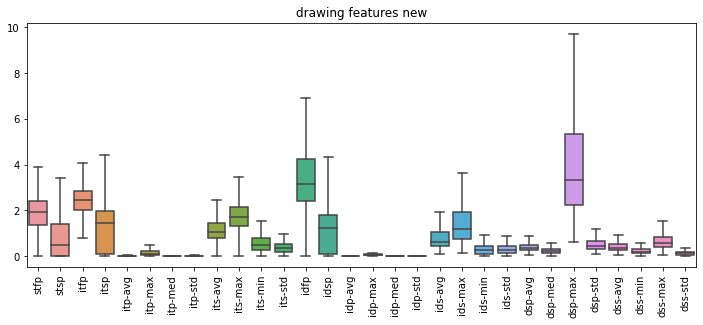

In [4]:
box(df_drawing_new, 'drawing features new')

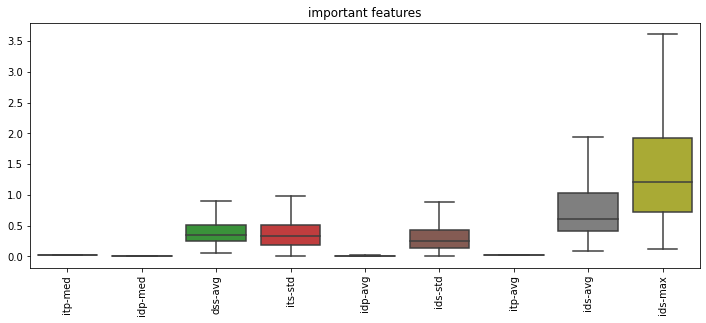

In [112]:
box(df_features, 'important features')

# Data preprocessing

Data cleaning

In [ ]:
# check the missing values in moca data
df_moca.isnull().sum()

In [ ]:
# check the missing value of drawing data
df_drawing.isnull().sum()

In [ ]:
# check the missing value of combined data
df_comb.isnull().sum()

In [ ]:
# eliminate the samples with missing values
df_moca.dropna(axis = 0, how = 'any', inplace = True)
df_drawing.dropna(axis = 0, how = 'any', inplace = True)
df_comb.dropna(axis = 0, how = 'any', inplace = True)

In [5]:
df_drawing_new.dropna(axis = 0, how = 'any', inplace = True)

In [ ]:
df_moca.isnull().sum()

In [ ]:
df_comb.isnull().sum()

In [6]:
df_drawing_new.isnull().sum()

stfp             0
stsp             0
itfp             0
itsp             0
itp-avg          0
itp-max          0
itp-med          0
itp-std          0
its-avg          0
its-max          0
its-min          0
its-std          0
idfp             0
idsp             0
idp-avg          0
idp-max          0
idp-med          0
idp-std          0
ids-avg          0
ids-max          0
ids-min          0
ids-std          0
dsp-avg          0
dsp-med          0
dsp-max          0
dsp-std          0
dss-avg          0
dss-min          0
dss-max          0
dss-std          0
Disease State    0
dtype: int64

Check the distribution of the data

In [ ]:
# get the names of the moca features
moca_col = list(df_moca.drop('Disease State', axis = 1).columns)
moca_col

In [108]:
# get the names of the drawing features
drawing_col = list(df_drawing.drop('Disease State', axis = 1).columns)
drawing_col

['stfp',
 'stsp',
 'itfp',
 'itsp',
 'itp-avg',
 'itp-max',
 'itp-med',
 'itp-std',
 'its-avg',
 'its-max',
 'its-min',
 'its-std',
 'idfp',
 'idsp',
 'idp-avg',
 'idp-max',
 'idp-med',
 'idp-std',
 'ids-avg',
 'ids-max',
 'ids-min',
 'ids-std',
 'dsp-avg',
 'dsp-med',
 'dsp-max',
 'dsp-std',
 'dss-avg',
 'dss-min',
 'dss-max',
 'dss-std']

In [ ]:
# get the names of the combined features
comb_col = list(df_comb.drop('Disease State', axis = 1).columns)
comb_col

In [7]:
drawing_new_col = list(df_drawing_new.columns)
drawing_new_col

['stfp',
 'stsp',
 'itfp',
 'itsp',
 'itp-avg',
 'itp-max',
 'itp-med',
 'itp-std',
 'its-avg',
 'its-max',
 'its-min',
 'its-std',
 'idfp',
 'idsp',
 'idp-avg',
 'idp-max',
 'idp-med',
 'idp-std',
 'ids-avg',
 'ids-max',
 'ids-min',
 'ids-std',
 'dsp-avg',
 'dsp-med',
 'dsp-max',
 'dsp-std',
 'dss-avg',
 'dss-min',
 'dss-max',
 'dss-std',
 'Disease State']

In [115]:
features_index = list(df_features.drop('Disease State', axis = 1).columns)
features_index

['itp-med',
 'idp-med',
 'dss-avg',
 'its-std',
 'idp-avg',
 'ids-std',
 'itp-avg',
 'ids-avg',
 'ids-max']

In [8]:
# define a function to plot the histogram to visualize the distribution of the moca features
def distribution(df, index):
  if df.columns[-1] == 'Disease State':
    df = df.drop('Disease State', axis = 1)
  for i in index:
    plt.figure(figsize = (8, 4.5))
    plt.hist(df[i])
    plt.xlabel('level of data')
    plt.ylabel('number of samples')
    plt.title(i)

In [ ]:
# check the distribution of moca features
distribution(df_moca, moca_col)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


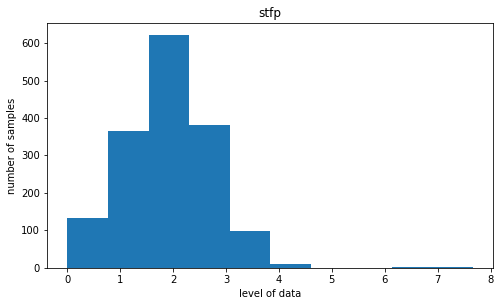

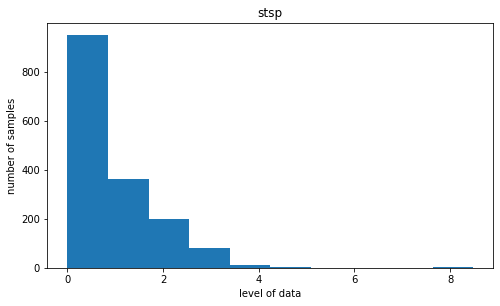

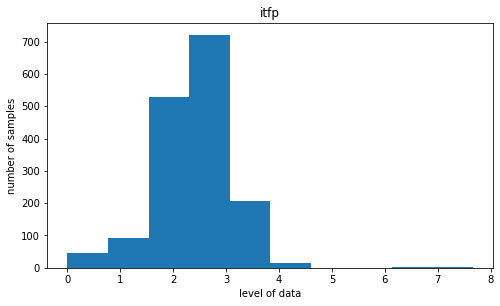

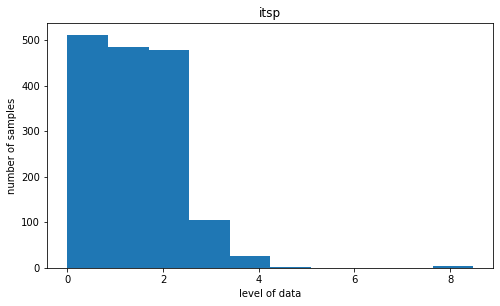

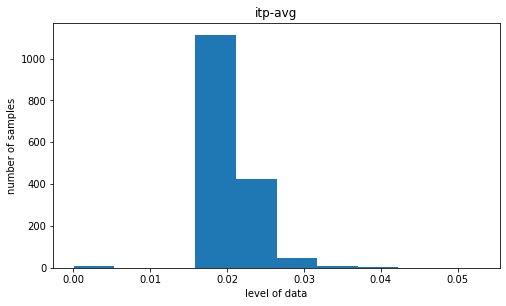

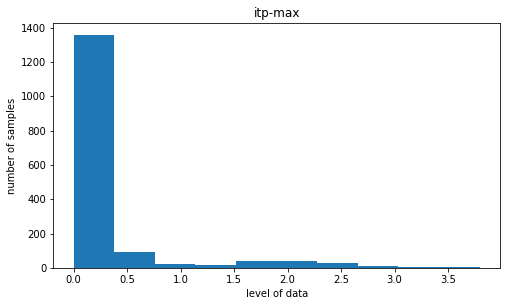

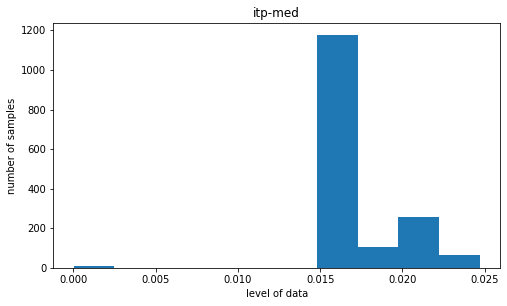

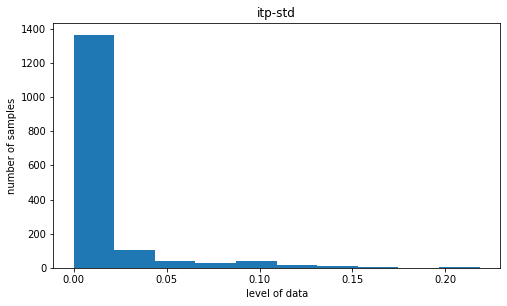

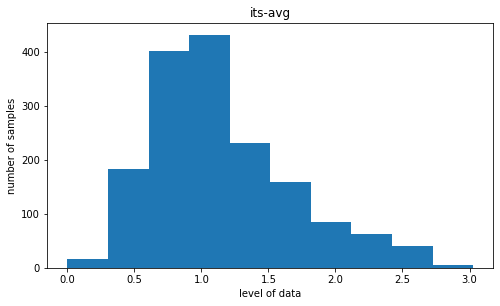

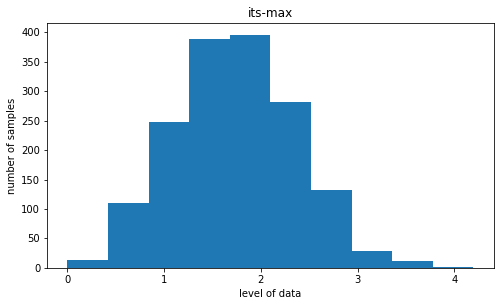

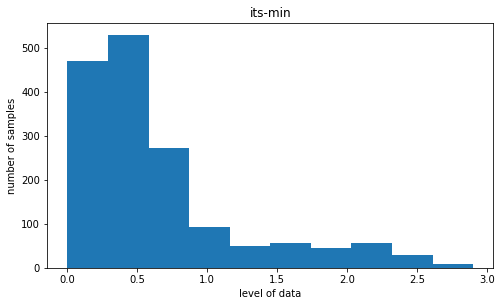

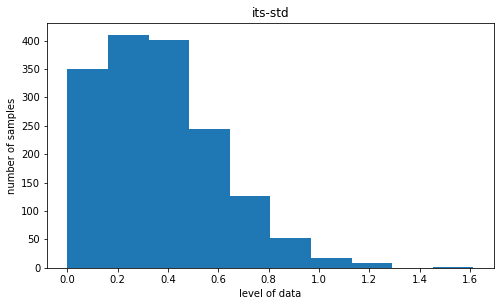

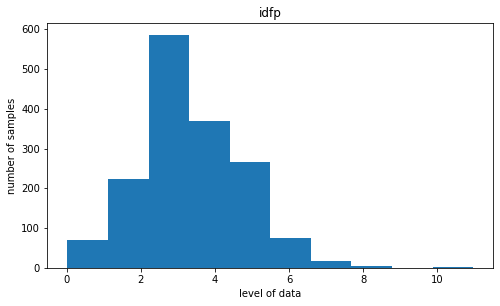

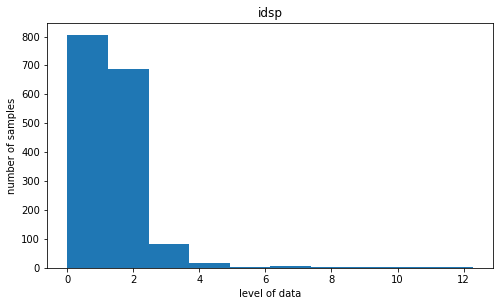

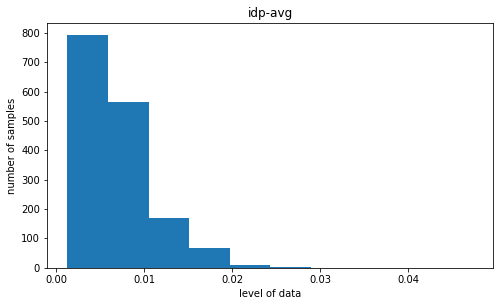

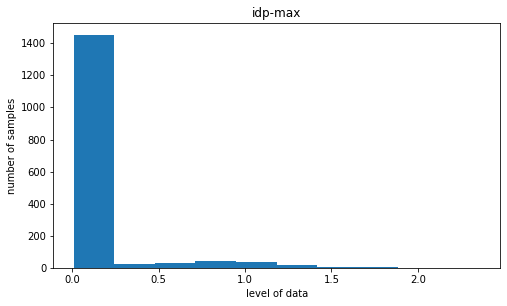

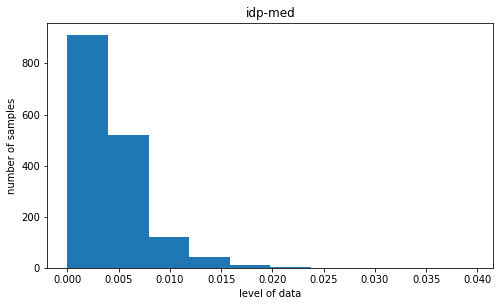

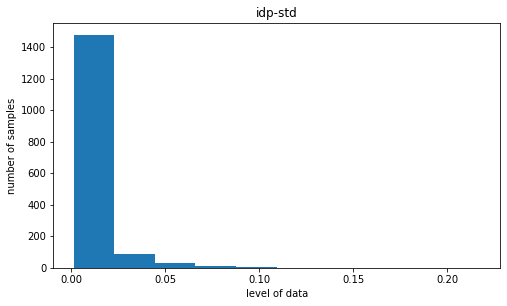

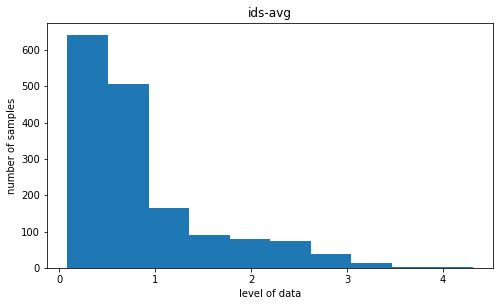

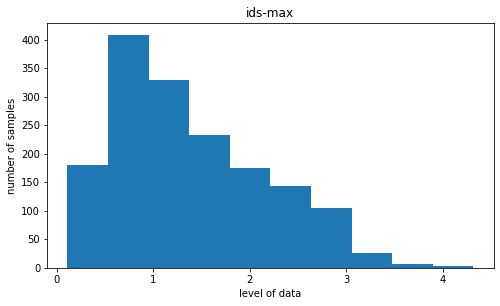

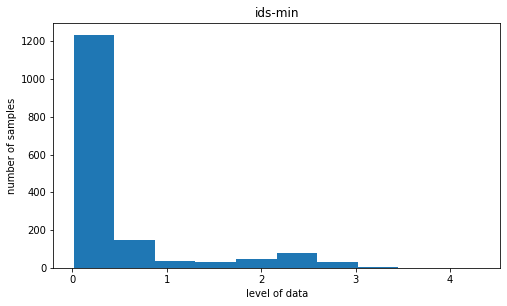

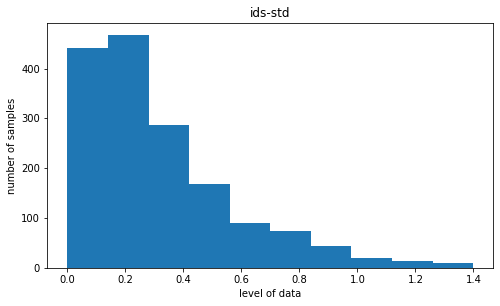

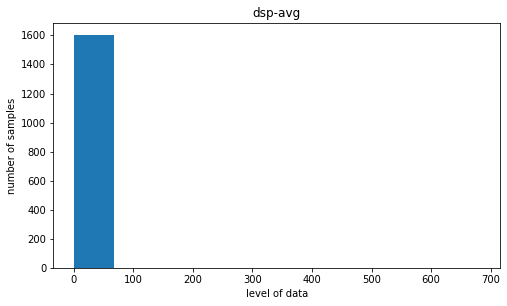

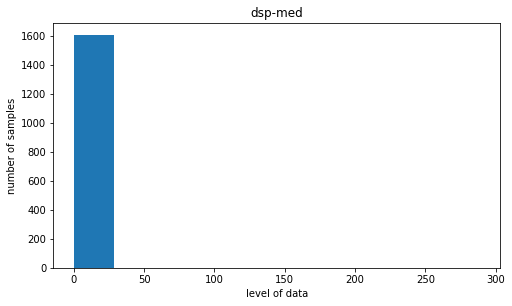

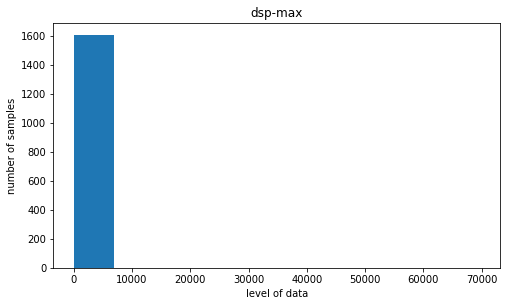

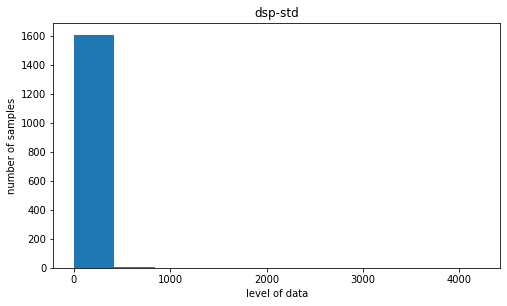

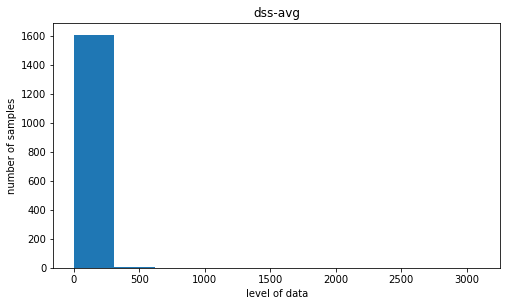

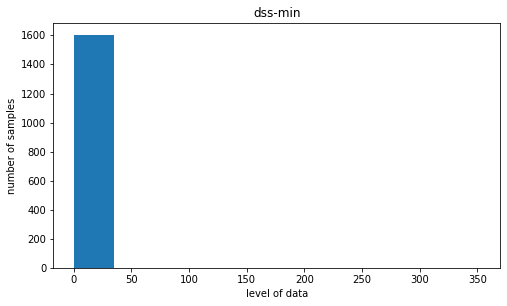

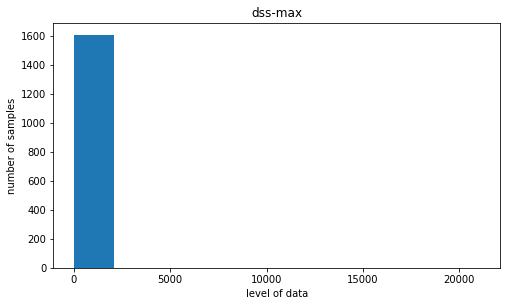

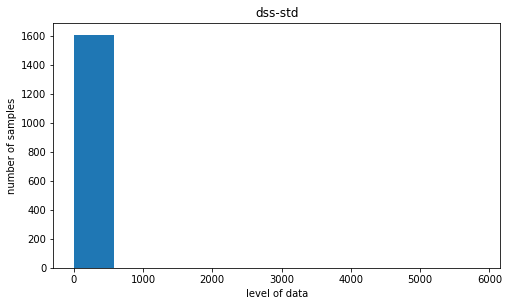

In [109]:
# check the distribution of drawing features
distribution(df_drawing, drawing_col)

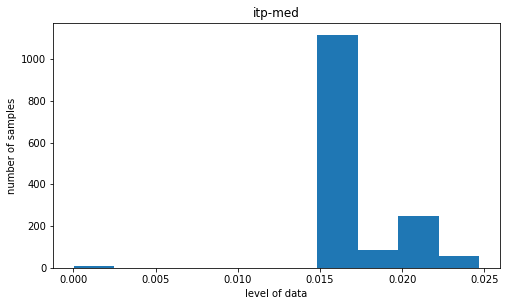

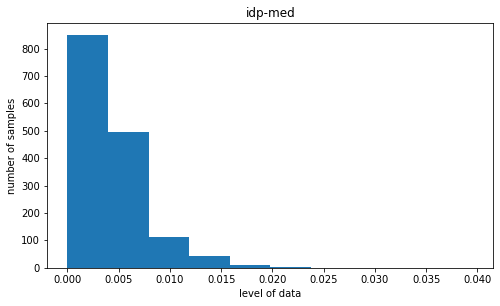

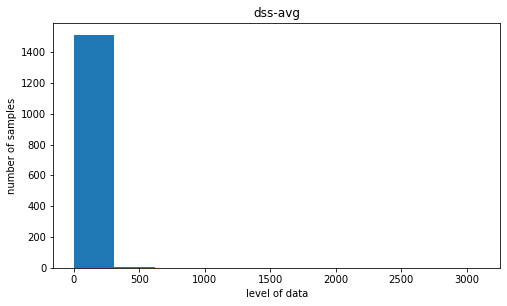

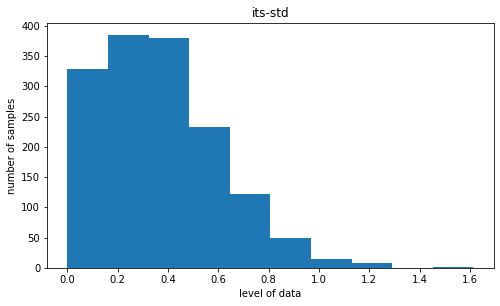

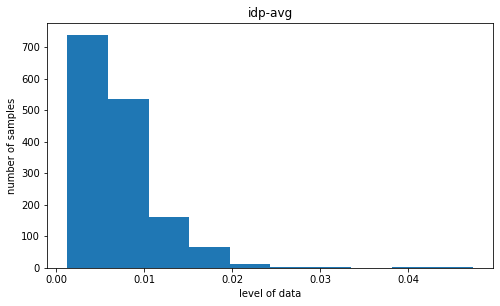

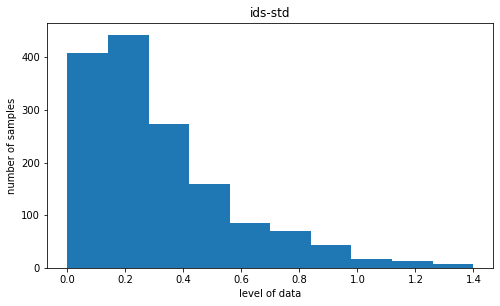

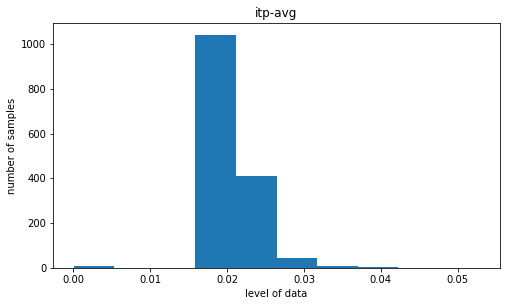

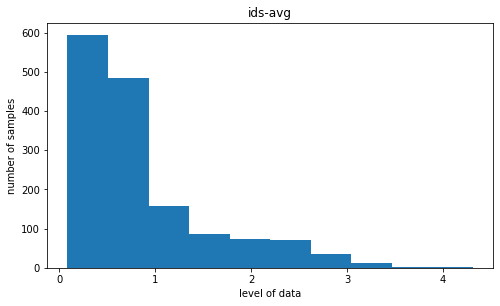

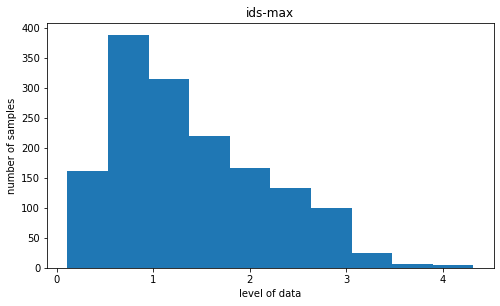

In [116]:
distribution(df_features, features_index)

Data normalization: transform the data to the same magnitude

In [10]:
# define a function to normaliza data using z-score normalization
def norm(df):
  if df.columns[-1] == 'Disease State':
    df = df.drop('Disease State', axis = 1)
  xmean = np.mean(df,0)
  std = np.std(df,0)
  df = (df - xmean) / std
  return df

In [452]:
# normalize the data
df_norm_moca = norm(df_moca)
df_norm_drawing = norm(df_drawing)
df_norm_comb = norm(df_comb)

In [117]:
df_norm_drawing_new = norm(df_drawing_new)
df_norm_features = norm(df_features)

In [ ]:
# show the distribution of normalized dataset
box(df_norm_moca.drop('MoCA Total', axis = 1), 'normalized MoCA features')

In [ ]:
box(df_norm_drawing, 'normalized drawing features')

In [ ]:
box(df_norm_comb, 'normalized combined features')

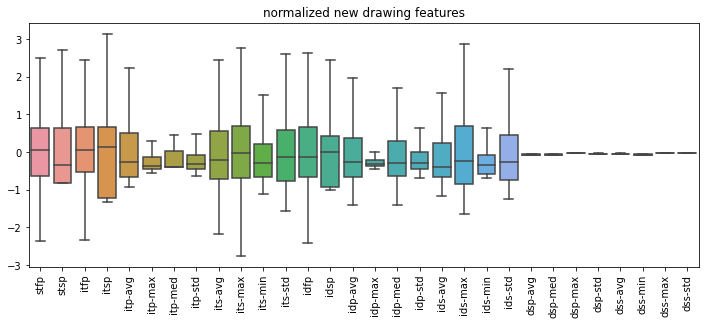

In [13]:
box(df_norm_drawing_new, 'normalized new drawing features')

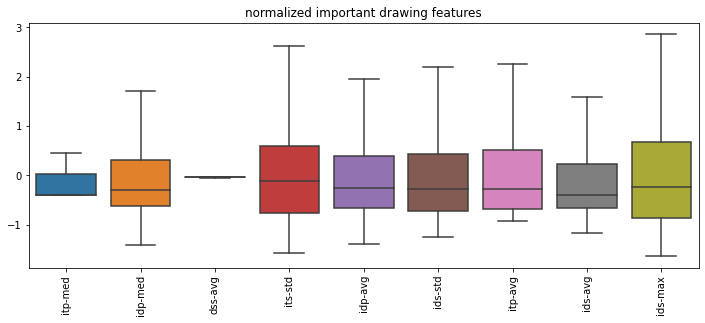

In [118]:
box(df_norm_features, 'normalized important drawing features')

# Split dataset using stratified splitting

In [14]:
# define a function to generate train and test set
def data_split(df, test_size):
  # split dataset
  X = df.drop('Disease State', axis = 1)
  y = df['Disease State']
  X = norm(X)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, stratify = y)

  # show the size of four splitted set
  print('The size of training set: {0};\nThe size of test set: {1};\nThe size of train label: {2};\nThe size of test label: {3}.\n'.
        format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

  # show the number of samples for each class in training set
  print('The number of sample for each class in training set:\n{}\n'.
        format(pd.value_counts(y_train)))

  # show the number of samples for each class in test set
  print('The number of sample for each class in test set:\n{}'.
        format(pd.value_counts(y_test)))

  return X_train, X_test, y_train, y_test

In [15]:
X_train, X_test, y_train, y_test = data_split(df_drawing_new, 0.3)

The size of training set: (1062, 30);
The size of test set: (456, 30);
The size of train label: (1062,);
The size of test label: (456,).

The number of sample for each class in training set:
0    765
1    297
Name: Disease State, dtype: int64

The number of sample for each class in test set:
0    329
1    127
Name: Disease State, dtype: int64


In [16]:
# define a function to check the distribution of class variable
def class_var_distribution(df):
  # plot the barchart of class variable
  plt.figure(figsize=(10,6))
  g = sns.barplot(df['Disease State'], df['Disease State'], 
                  palette = 'Set1', estimator = lambda x: len(x) / len(df) )

  # graph statistics
  for p in g.patches:
          width, height = p.get_width(), p.get_height()
          x, y = p.get_xy() 
          g.text(x+width/2, 
                y+height, 
                '{:.0%}'.format(height), 
                horizontalalignment='center',fontsize=15)

  # set the label
  plt.xlabel('Disease State', fontsize=14)
  plt.ylabel('Precentage', fontsize=14)
  plt.title('Percentage of samples have/do not have Alzheimer', fontsize=16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


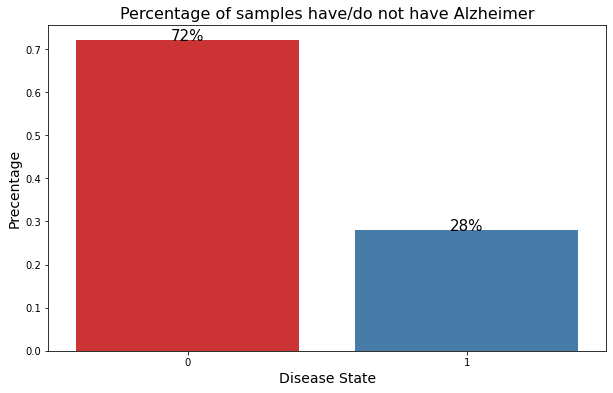

In [19]:
class_var_distribution(df_drawing_new)

# Model training

Define evaluation metrics function

In [20]:
def evalutaion(X_train, X_test, y_train, y_test, pred_train, pred_test, roc_set, model):
  # accuracy
  train_acc = accuracy_score(y_train, pred_train)
  test_acc = accuracy_score(y_test, pred_test)
  print ("trainset accuracy: {0:.2f}, testset accuracy: {1:.2f}".format(train_acc, test_acc))
  
  # other three evaluation metrics: precision, sensitivity and F1-score
  if roc_set == 'train':
    # precision, recall, F1, _ = precision_recall_fscore_support(y_train, pred_train, average = 'micro')
    CM = confusion_matrix(y_train, pred_train, labels = [0, 1]) 
    precision = CM[0, 0] / (CM[0, 0] + CM[1, 0])
    sensitivity = CM[0, 0] / (CM[0, 0] + CM[0, 1])
    specificity = CM[1, 1]/(CM[1, 0] + CM[1, 1])
    F1 = (2 * precision * sensitivity) / (precision + sensitivity)
    print("precision: {0:.2f}, sensitivity: {1:.2f}, specificity: {2:.2f}, F1-score: {3:.2f}".format(precision, sensitivity, specificity, F1))  
  elif roc_set == 'test':
    # precision, recall, F1, _ = precision_recall_fscore_support(y_test, pred_test, average = 'micro')
    CM = confusion_matrix(y_test, pred_test, labels = [0, 1])
    precision = CM[0, 0] / (CM[0, 0] + CM[1, 0])
    sensitivity = CM[0, 0] / (CM[0, 0] + CM[0, 1])
    specificity = CM[1, 1]/(CM[1, 0] + CM[1, 1])
    F1 = (2 * precision * sensitivity) / (precision + sensitivity)   
    specificity = CM[1,1]/(CM[1,0]+CM[1,1])
    print("precision: {0:.2f}, sensitivity: {1:.2f}, specificity: {2:.2f}, F1-score: {3:.2f}".format(precision, sensitivity, specificity, F1))  

  # plot heatmap for confusion matrix
  fig, ax = plt.subplots(figsize=(8, 4.5))
  sns.heatmap(CM, fmt='.0f', cmap="Reds",
              square=True, linewidths=.5, annot=True)
  plt.xlabel('predicted label')
  plt.ylabel('true label')
  plt.title('confusion matrix')
  plt.show()
  
  # plot ROC Cruve 
  if roc_set == 'train':
    prob_test = model.predict_proba(X_train)
    predict_test_value = prob_test[:, 1]
    fpr, tpr, thresholds = roc_curve(y_train, predict_test_value)
  elif roc_set == 'test':
    prob_test = model.predict_proba(X_test)
    predict_test_value = prob_test[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, predict_test_value)
  roc_auc = auc(fpr, tpr)
  plt.figure(figsize = (8, 4.5))
  plt.title("ROC Curve")
  plt.plot(fpr, tpr, "b", label="AUC = %0.2f" % roc_auc)
  plt.legend(loc="lower right")
  plt.plot([0, 1], [0, 1], "r--")
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel("True Positive Rate")
  plt.xlabel("False Positive Rate")
  plt.show()

define a function to plot learning curve of the model

In [21]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    scoring : str or callable, default=None
        A str (see model evaluation documentation) or
        a scorer callable object / function with signature
        ``scorer(estimator, X, y)``.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

Define a function to select the important features based on permutation importance

In [22]:
def perm_importances(X, y, num_features, model):
  # prepare dataset
  index = X.columns.to_numpy()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)

  # train the model
  model.fit(X_train, y_train)

  # select feature using permutation ranking
  perm_importance = permutation_importance(model, X_test, y_test, random_state = 12)
  num_nonzero = np.count_nonzero(perm_importance.importances_mean)
  sorted_idx = perm_importance.importances_mean.argsort()
  plt.figure(figsize = (7.5, 4.5))
  plt.barh(index[sorted_idx][-num_features:], perm_importance.importances_mean[sorted_idx][-num_features:])
  plt.xlabel("Importance")
  plt.ylabel('important features')
  plt.title('Permutation importances')
  plt.show()

  # return selected features
  if num_nonzero > num_features:
    selected_features = index[sorted_idx][-num_features:]
  else:
    selected_features = index[sorted_idx][-num_nonzero:]

  return selected_features

Decision tree

In [119]:
# define a deciciosn tree classifier
# df: the set to classify
# roc_set: train/test  
def dt_classifier(df, roc_set):
  # define dataset and label
  X = df.drop('Disease State', axis = 1)
  y = df['Disease State']

  # normalize training set
  X = norm(X)

  # split the dataset to trainset and testset
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0, stratify = y)
  
  # train the model
  dtree = DecisionTreeClassifier(criterion="entropy", random_state=123,
                                max_depth=4,min_samples_leaf=5, 
                                class_weight = 'balanced')
  dtree.fit(X_train, y_train)
  
  # prediction
  pred_train = dtree.predict(X_train)
  pred_test = dtree.predict(X_test)
 
  # perform evaluation
  evalutaion(X_train, X_test, y_train, y_test, pred_train, pred_test, roc_set, dtree)

  # the importances of features
  features = list(X_test.columns)
  importances = dtree.feature_importances_
  indices = np.argsort(importances)[::-1]
  num_features = len(importances)
  num_nonzero = np.count_nonzero(importances)

  # plot learning curve 
  fig, axes = plt.subplots(3, 1, figsize=(8, 16))

  title = "Learning Curves (Decision tree)"
  # Cross validation with 50 iterations to get smoother mean test and train
  # score curves, each time with 20% data randomly selected as a validation set.
  cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

  estimator = dtree
  plot_learning_curve(
      estimator,
      title,
      X,
      y,
      axes=axes,
      ylim=(0.5, 0.85),
      cv=cv,
      n_jobs=4,
      scoring="accuracy",
  )
  plt.show()

  # select important feature based on permutation importance
  selected_features_permutation = perm_importances(X, y, 5, dtree)

  return features, importances, indices, num_nonzero, selected_features_permutation

In [120]:
# plot the importances of features using bar chart
def importance_barchart_dt(features, importances, indices, num_nonzero):
  plt.figure()
  plt.figure(figsize = (8, 4.5))
  plt.title("Important features")
  plt.bar(range(num_nonzero), importances[indices][:num_nonzero], color="g", align="center")
  plt.xticks(range(num_nonzero), [features[i] for i in indices[:num_nonzero]], rotation='45')
  plt.xlabel('feature')
  plt.ylabel('importance')
  plt.xlim([-1, num_nonzero])
  plt.show()

In [121]:
def show_importance(features, importances, indices):
# show importances of all features
 for i in indices:
     print ("{0} - {1:.3f}".format(features[i], importances[i]))

trainset accuracy: 0.68, testset accuracy: 0.65
precision: 0.91, sensitivity: 0.57, specificity: 0.85, F1-score: 0.70


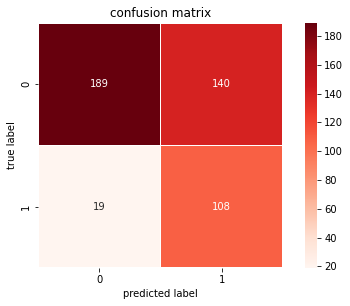

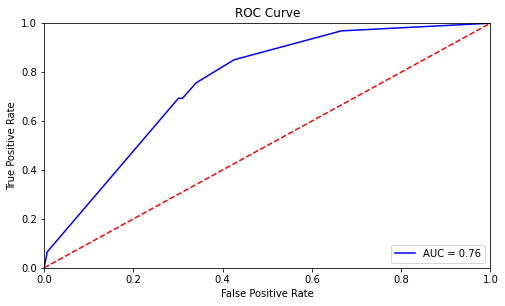

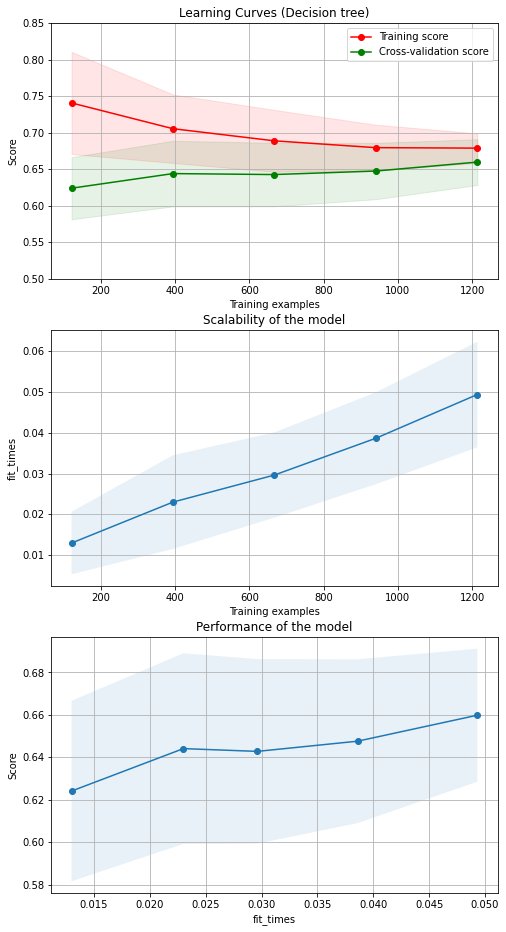

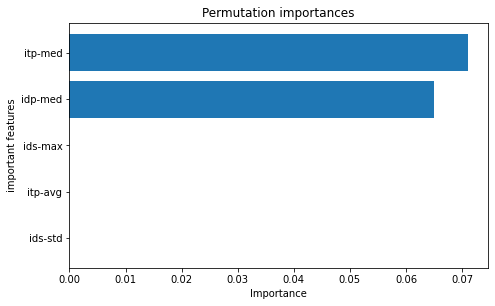

<Figure size 432x288 with 0 Axes>

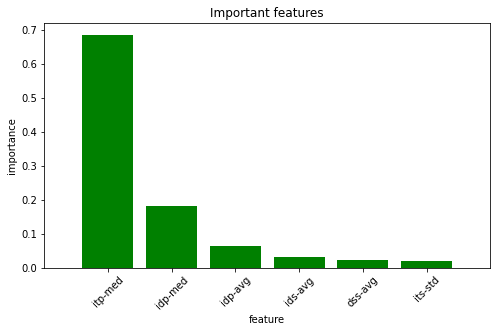

In [122]:
# train the model and show the results
features, importances, indices, num_nonzero, features_perm = dt_classifier(df_features, 'test')
importance_barchart_dt(features, importances, indices, num_nonzero)

In [77]:
df_important_features = pd.DataFrame(features_perm[::-1])
df_important_features

,0
0,idp-med
1,itp-med
2,dss-avg
3,its-avg
4,dss-std


Random forest

In [78]:
# define a random forest classifier
# df: the set to classify
# roc_set: train/test  
def rf_classifier(df, roc_set):
  # define dataset and label
  X = df.drop(['Disease State'], axis = 1)
  y = df['Disease State']

  # normalize training set
  X = norm(X)

  # split the dataset to trainset and testset
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 6, stratify = y)
  
  # define the model
  forest = RandomForestClassifier(
      n_estimators=10, criterion="entropy",
      max_depth=4, min_samples_leaf=5,
      class_weight = 'balanced', random_state = 123)
  forest.fit(X_train, y_train)
  
  # prediction
  pred_train = forest.predict(X_train)
  pred_test = forest.predict(X_test)
 
  # perform evaluation
  evalutaion(X_train, X_test, y_train, y_test, pred_train, pred_test, roc_set, forest)

  # the importances of features
  features = list(X_test.columns)
  importances = forest.feature_importances_
  indices = np.argsort(importances)[::-1]
  num_features = len(importances)
  num_nonzero = np.count_nonzero(importances)

  # plot learning curve 
  fig, axes = plt.subplots(3, 1, figsize=(8, 16))

  title = "Learning Curves (Decision tree)"
  # Cross validation with 50 iterations to get smoother mean test and train
  # score curves, each time with 20% data randomly selected as a validation set.
  cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

  estimator = forest
  plot_learning_curve(
      estimator,
      title,
      X,
      y,
      axes=axes,
      ylim=(0.6, 0.95),
      cv=cv,
      n_jobs=4,
      scoring="accuracy",
  )
  plt.show()

  # select important feature based on permutation importance
  selected_features_permutation = perm_importances(X, y, 5, forest)

  return features, importances, indices, num_nonzero, selected_features_permutation

In [79]:
# plot the importances of features using bar chart
def importance_barchart_rf(features, importances, indices, num_nonzero):
  plt.figure()
  plt.figure(figsize = (8, 4.5))
  plt.title("Important features")
  plt.bar(range(num_nonzero), importances[indices][:num_nonzero], color="g", align="center")
  plt.xticks(range(num_nonzero), [features[i] for i in indices[:num_nonzero]], rotation='90')
  plt.xlabel('feature')
  plt.ylabel('importance')
  plt.xlim([-1, num_nonzero])
  plt.show()

trainset accuracy: 0.70, testset accuracy: 0.66
precision: 0.89, sensitivity: 0.60, specificity: 0.81, F1-score: 0.72


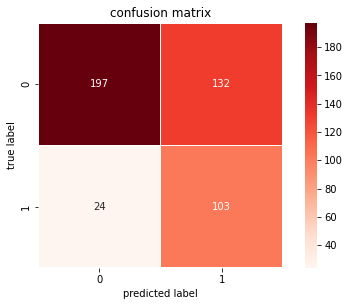

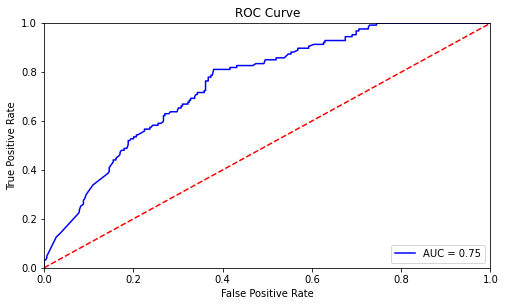

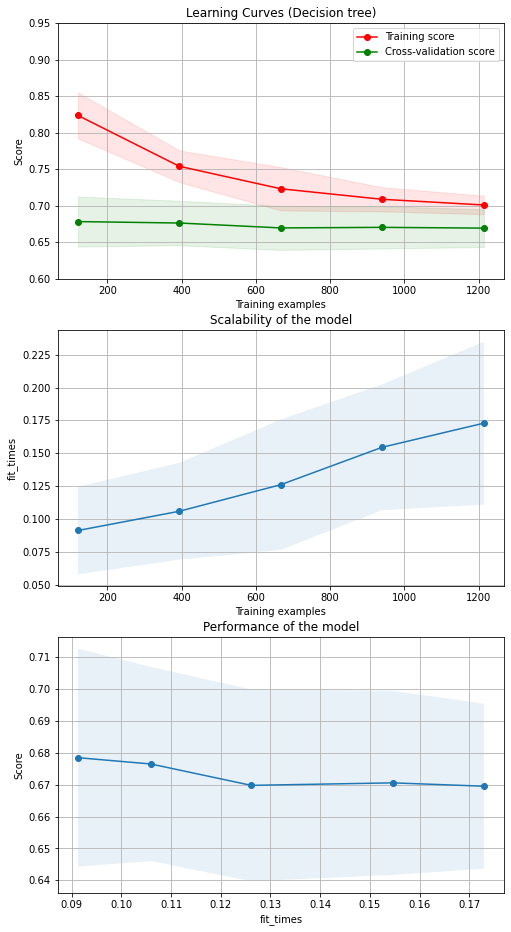

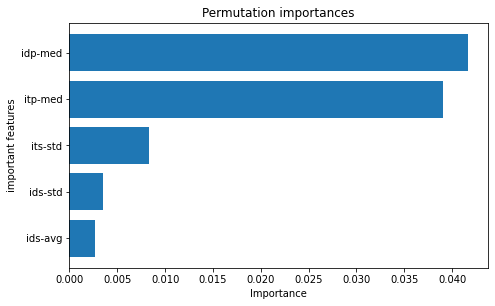

<Figure size 432x288 with 0 Axes>

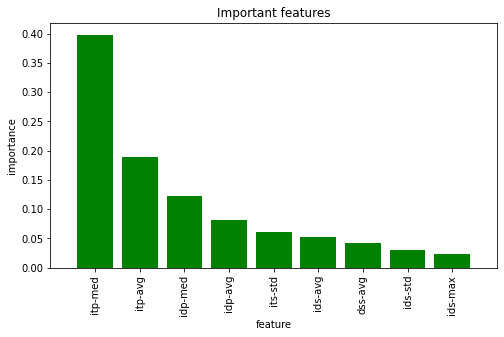

In [123]:
# train the model and show the results
features, importances, indices, num_nonzero, features_perm = rf_classifier(df_features, 'test')
importance_barchart_rf(features, importances, indices, num_nonzero)

In [81]:
df_important_features = pd.DataFrame(features_perm[::-1])
df_important_features

,0
0,itp-med
1,idp-med
2,dss-avg
3,its-std
4,idp-avg


KNN

In [82]:
from sklearn.utils import class_weight
def num_nbr_selection(df, kfold):
  # prepare dataset
  X = df.drop(['Disease State'], axis = 1)
  y = df['Disease State'].to_numpy()
  X = norm(X).to_numpy()

  # define 10 candidate number
  fs =[1,2,3,4,5,6,7,8,9,10]

  # perform k fold cross validation，return the index of training and test set
  n_split = kfold
  fk = KFold(n_splits = n_split, random_state=2001, shuffle=True)

  # assume 1 neigbor is the best
  best_k = fs[0]
  # define a variable to take accuracy
  best_score = 0

  # iterate over all candidate values
  for k in fs:
    # record the sum of accuracy 
    curr_score = 0
    # iterate over all folds
    for train_index,valid_index in fk.split(X):
      # define KNN model
      clf = KNeighborsClassifier(n_neighbors = k)
      # train KNN model
      clf.fit(X[train_index], y[train_index])
      # calculate the accuracy
      curr_score = curr_score + clf.score(X[valid_index], y[valid_index])
    # Calculate the average accuracy value when the K = k
    avg_score = curr_score / n_split
    print('The mean of accuracy: %.2f' % avg_score)
    # compare the accurcay
    if avg_score > best_score:
      # replace with the best accuracy
      best_score = avg_score
      # replace with the best k
      best_k = k
    print('The best K until now: %d'%best_k,"The best accuracy until now: %.2f"%best_score)
    print("*"*50)
  print('The best K based on the evaluation: %d'%best_k,"The accrucay of model with best K: %.2f"%best_score)

In [124]:
num_nbr_selection(df_features, 10)

The mean of accuracy: 0.67
The best K until now: 1 The best accuracy until now: 0.67
**************************************************
The mean of accuracy: 0.72
The best K until now: 2 The best accuracy until now: 0.72
**************************************************
The mean of accuracy: 0.69
The best K until now: 2 The best accuracy until now: 0.72
**************************************************
The mean of accuracy: 0.71
The best K until now: 2 The best accuracy until now: 0.72
**************************************************
The mean of accuracy: 0.69
The best K until now: 2 The best accuracy until now: 0.72
**************************************************
The mean of accuracy: 0.71
The best K until now: 2 The best accuracy until now: 0.72
**************************************************
The mean of accuracy: 0.70
The best K until now: 2 The best accuracy until now: 0.72
**************************************************
The mean of accuracy: 0.71
The best K until now:

In [130]:
# define a KNN classifier
# df: the set to classify
# roc_set: train/test  
def knn_classifier(df, roc_set):
  # define dataset and label
  X = df.drop(['Disease State'], axis = 1)
  y = df['Disease State']

  # normalize training set
  X = norm(X)

  # split the dataset to trainset and testset
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
  
  # define the model
  knn = KNeighborsClassifier(n_neighbors = 8)
  knn.fit(X_train, y_train)
  
  # prediction
  pred_train = knn.predict(X_train)
  pred_test = knn.predict(X_test)
 
  # perform evaluation
  evalutaion(X_train, X_test, y_train, y_test, pred_train, pred_test, roc_set, knn)

  # plot learning curve 
  fig, axes = plt.subplots(3, 1, figsize=(8, 16))

  title = "Learning Curves (Decision tree)"
  # Cross validation with 50 iterations to get smoother mean test and train
  # score curves, each time with 20% data randomly selected as a validation set.
  cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

  estimator = knn
  plot_learning_curve(
      estimator,
      title,
      X,
      y,
      axes=axes,
      ylim=(0.5, 1.01),
      cv=cv,
      n_jobs=4,
      scoring="accuracy",
  )
  plt.show()

  # select important feature based on permutation importance
  selected_features_permutation = perm_importances(X, y, 5, knn)

  return selected_features_permutation

trainset accuracy: 0.77, testset accuracy: 0.73
precision: 0.76, sensitivity: 0.93, specificity: 0.23, F1-score: 0.83


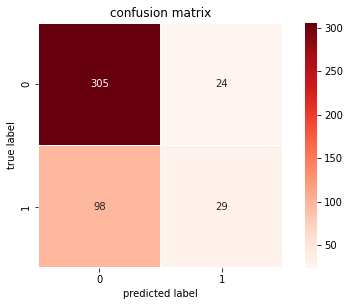

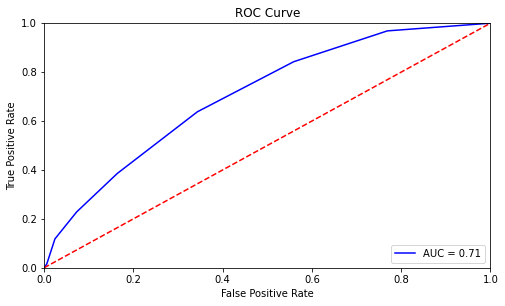

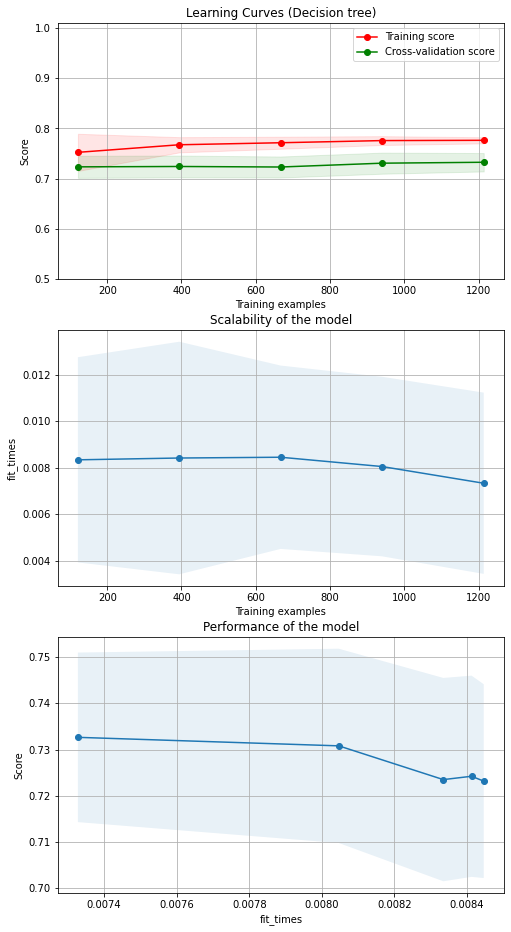

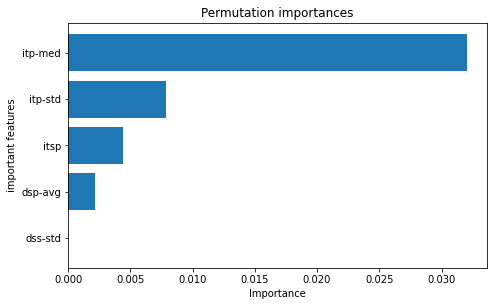

In [131]:
features_perm = knn_classifier(df_drawing_new, 'test')

In [88]:
df_important_features = pd.DataFrame(features_perm[::-1])
df_important_features

,0
0,itp-med
1,ids-std
2,idp-med
3,ids-min
4,itp-max


Naive Bayes 

In [132]:
# define a naive bayes classifier
# df: the set to classify
# roc_set: train/test  
# model: G/B (G: Gaussian naive bayes model, B: Bernoulli naive bayes model)
def nb_classifier(df, roc_set, model):
  # define dataset and label
  X = df.drop(['Disease State'], axis = 1)
  y = df['Disease State']

  # normalize training set
  X = norm(X)

  # split the dataset to trainset and testset
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
  
  # define the model
  if model == 'G':
    clf = GaussianNB()
  elif model == 'B':
    clf = BernoulliNB()
  clf.fit(X_train, y_train)
  
  # prediction
  pred_train = clf.predict(X_train)
  pred_test = clf.predict(X_test)
 
  # perform evaluation
  evalutaion(X_train, X_test, y_train, y_test, pred_train, pred_test, roc_set, clf)

  # plot learning curve 
  fig, axes = plt.subplots(3, 1, figsize=(8, 16))

  title = "Learning Curves (Decision tree)"
  # Cross validation with 50 iterations to get smoother mean test and train
  # score curves, each time with 20% data randomly selected as a validation set.
  cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

  estimator = clf
  plot_learning_curve(
      estimator,
      title,
      X,
      y,
      axes=axes,
      ylim=(0.65, 0.8),
      cv=cv,
      n_jobs=4,
      scoring="accuracy",
  )
  plt.show()

  # select important feature based on permutation importance
  selected_features_permutation = perm_importances(X, y, 5, clf)

  return selected_features_permutation

trainset accuracy: 0.70, testset accuracy: 0.74
precision: 0.82, sensitivity: 0.82, specificity: 0.52, F1-score: 0.82


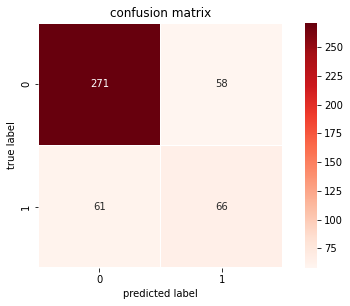

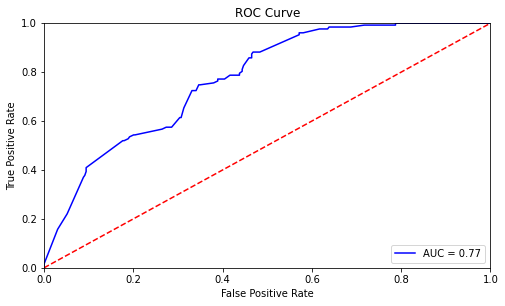

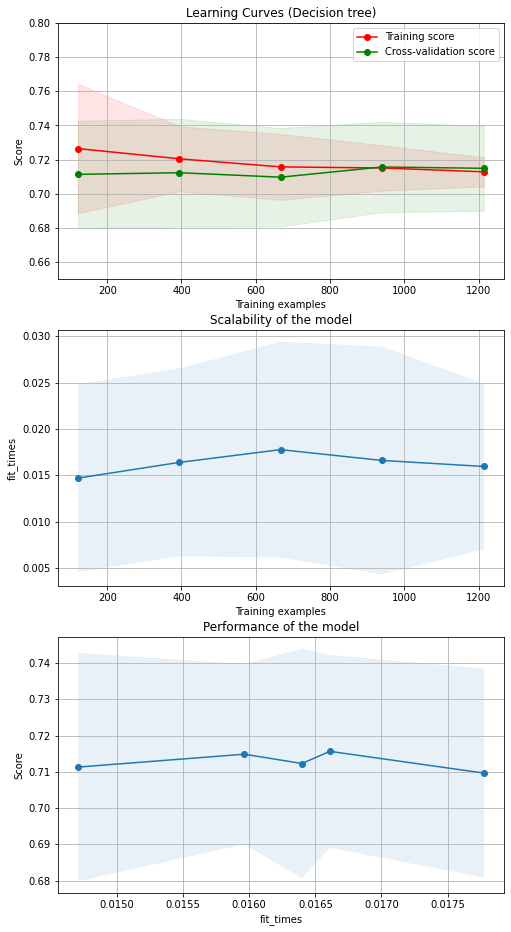

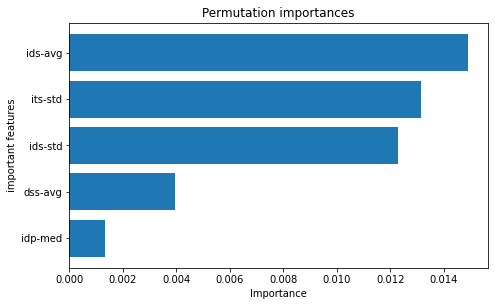

In [134]:
features_perm = nb_classifier(df_features, 'test', 'B')

In [105]:
df_important_features = pd.DataFrame(features_perm[::-1])
df_important_features

,0
0,dsp-max
1,dsp-std
2,idp-med
3,dss-min
4,dss-avg


SVM

In [136]:
# define a svm classifier
# df: the set to classify
# roc_set: train/test  
def svm_classifier(df, roc_set):
  # define dataset and label
  X = df.drop(['Disease State'], axis = 1)
  y = df['Disease State']

  # normalize training set
  X = norm(X)

  # split the dataset to trainset and testset
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7, stratify = y)
  
  # define the model
  svc = svm.SVC(kernel = 'linear', probability = True, class_weight = 'balanced')
  svc.fit(X_train, y_train)
  
  # prediction
  pred_train = svc.predict(X_train)
  pred_test = svc.predict(X_test)
 
  # perform evaluation
  evalutaion(X_train, X_test, y_train, y_test, pred_train, pred_test, roc_set, svc)

  # plot learning curve 
  fig, axes = plt.subplots(3, 1, figsize=(8, 16))

  title = "Learning Curves (Decision tree)"
  # Cross validation with 50 iterations to get smoother mean test and train
  # score curves, each time with 20% data randomly selected as a validation set.
  cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

  estimator = svc
  plot_learning_curve(
      estimator,
      title,
      X,
      y,
      axes=axes,
      ylim=(0.5, 1.01),
      cv=cv,
      n_jobs=4,
      scoring="accuracy",
  )
  plt.show()

  # select important feature based on permutation importance
  selected_features_permutation = perm_importances(X, y, 5, svc)

  return selected_features_permutation

trainset accuracy: 0.59, testset accuracy: 0.59
precision: 0.92, sensitivity: 0.47, specificity: 0.90, F1-score: 0.62


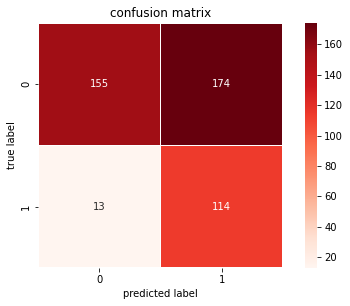

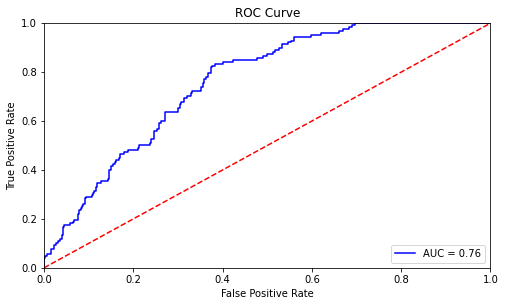

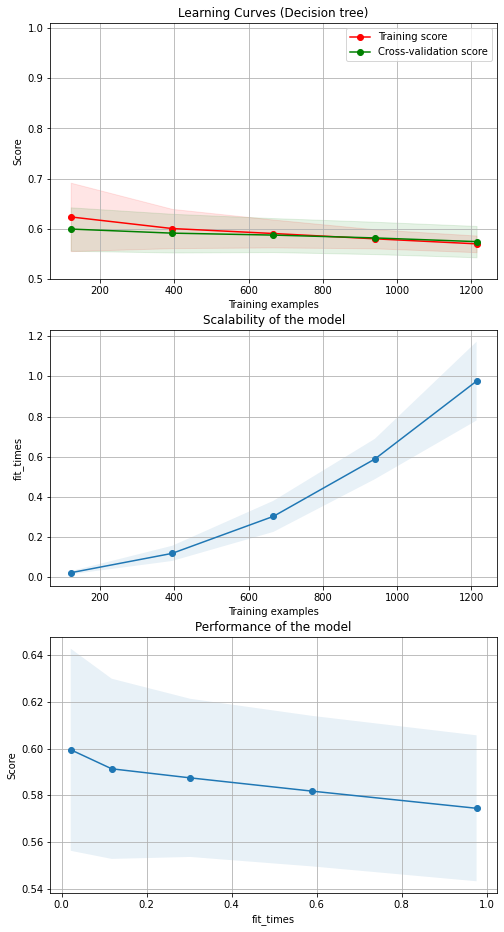

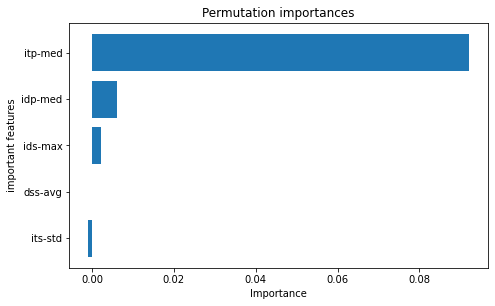

In [140]:
features_perm = svm_classifier(df_features, 'test')

In [102]:
df_important_features = pd.DataFrame(features_perm[::-1])
df_important_features

,0
0,itp-med
1,idp-med
2,idp-avg
3,itp-avg
4,ids-avg
